# Ames Housing Data EDA

This project aims to predict housing prices in Ames, Iowa based on the famous Ames Iowa Housing Dataset from the City Assessor's Office.

This notebook includes python code for data extraction, cleaning and transformation. Model Fitting and Analysis code can be found in the Ames_Models notebook.

# Sections and steps

- <a href="#SHP">Reading in Data</a><br>
    - read in training data
- <a href="#ER">Exploratory Data Analysis</a><br>
- <a href="#match">Matching Electoral Precincts to 2022 Districts</a><br>
- <a href="#exp">Exporting Cleaned Datasets</a><br>

<p><a name="SHP"></a></p>

## Importing Packages, Reading in Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

In [2]:
#importing helper functions from helper module
#from helper_module import centroid_match

### Reading in train data

In [5]:
train = pd.read_csv('./Data/train.csv')
train.head()
#train.drop(['Unnamed: 0'], axis=1, inplace=True)
print(f"Read in Ames Housing Train Data - Shape: {train.shape}")

Read in Ames Housing Train Data - Shape: (1460, 81)


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<p><a name="ER"></a></p>

## Exploratory Data Analysis

### Dependent Variable - Sale Price

In [7]:
#descriptive summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

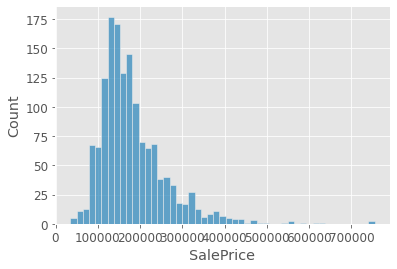

In [9]:
#plotting a histogram using seaborn
#histogram
sns.histplot(train['SalePrice']);

Noticing that the dependent variable looks right skewed (aka not normally distributed)

In [11]:
#checking skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


To ensure that the residuals of a linear model taken will be normal, we will take the log of the Sale Price instead of the Sale Price.

In [12]:
#adding a column for log of sale price
train['log_SalePrice'] = np.log(train['SalePrice'])

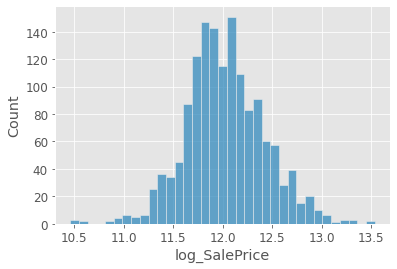

In [13]:
sns.histplot(train['log_SalePrice']);

In [9]:
#empty columns for 2022 state legislative districts
tx_2020['SD'] = 0
tx_2020['HD'] = 0

#calculating two-party vote totals for state-wide races in each precinct
tx_2020['G20PRETOT'] = tx_2020['G20PRERTRU'] + tx_2020['G20PREDBID'] #US Presidential Race
tx_2020['G20USSTOT'] = tx_2020['G20USSRCOR'] + tx_2020['G20USSDHEG'] #US Senate Race
tx_2020['G20RRCTOT'] = tx_2020['G20RRCRWRI'] + tx_2020['G20RRCDCAS'] #Texas Rail Road Commissioner

#slimming dataframe to state-wide races of interest
tx_2020 = tx_2020.loc[:, ['CNTY','PCTKEY',
                          'G20PRERTRU','G20PRETOT',
                          'G20USSRCOR','G20USSTOT',
                          'G20RRCRWRI','G20RRCTOT',
                          'SD','HD','geometry']]

#renaming columns for readability
tx_2020.columns = ['county_key','prec_key',
                   'pre_20_r', 'pre_20_tot',
                   'uss_20_r', 'uss_20_tot',
                   'rrc_20_r','rrc_20_tot',
                   'SD','HD','geometry']
tx_2020.columns

Index(['county_key', 'prec_key', 'pre_20_r', 'pre_20_tot', 'uss_20_r',
       'uss_20_tot', 'rrc_20_r', 'rrc_20_tot', 'SD', 'HD', 'geometry'],
      dtype='object')

In [10]:
#checking number of precincts
print('Texas 2020 returns have ' + str(tx_2020.shape[0]) + ' precincts.')

Texas 2020 returns have 9014 precincts.


### Cleaning 2018 Election Returns

In [11]:
tx_2018 = gpd.read_file('data/raw/elec_ret/tx_vest_18/tx_vest_18.shp')
tx_2018 = tx_2018.to_crs(epsg=3857)

In [12]:
#Creating an empty column to designate 2022 State Senate District
# and 2022 State House District
tx_2018['SD'] = np.nan
tx_2018['HD'] = np.nan

#Creating two-party vote totals for each of the state-wide races
tx_2018['G18USSTOT'] = tx_2018['G18USSRCRU'] + tx_2018['G18USSDORO'] #US Senate Race
tx_2018['G18GOVTOT'] = tx_2018['G18GOVRABB'] + tx_2018['G18GOVDVAL'] #TX Gov Race
tx_2018['G18LTGTOT'] = tx_2018['G18LTGRPAT'] + tx_2018['G18LTGDCOL'] #TX Lt Gov Race
tx_2018['G18ATGTOT'] = tx_2018['G18ATGRPAX'] + tx_2018['G18ATGDNEL'] #TX Attorney Gen race
tx_2018['G18COMTOT'] = tx_2018['G18COMRHEG'] + tx_2018['G18COMDCHE'] #TX Comptroller Race
tx_2018['G18LANTOT'] = tx_2018['G18LANRBUS'] + tx_2018['G18LANDSUA'] #TX Com of Land Race
tx_2018['G18AGRTOT'] = tx_2018['G18AGRRMIL'] + tx_2018['G18AGRDOLS'] #TX Com of Ag
tx_2018['G18RRCTOT'] = tx_2018['G18RRCRCRA'] + tx_2018['G18RRCDMCA'] #TX Railroad Commissioner

#trimming dataframe to state-wide races of interest
col_to_keep = ['CNTY','PCTKEY',
               'G18USSRCRU','G18USSTOT',
               'G18GOVRABB','G18GOVTOT',
               'G18LTGRPAT','G18LTGTOT',
               'G18ATGRPAX','G18ATGTOT',
               'G18COMRHEG','G18COMTOT',
               'G18LANRBUS','G18LANTOT',
               'G18AGRRMIL','G18AGRTOT',
               'G18RRCRCRA','G18RRCTOT',
               'SD','HD','geometry']
tx_2018 = tx_2018.loc[:, col_to_keep ]

#renaming columns
tx_2018.columns = ['county_key','prec_key',
                   'uss_18_r','uss_18_tot',
                   'gov_18_r','gov_18_tot',
                   'ltg_18_r','ltg_18_tot',
                   'atg_18_r','atg_18_tot',
                   'com_18_r','com_18_tot',
                   'lan_18_r','lan_18_tot',
                   'agr_18_r','agr_18_tot',
                   'rrc_18_r','rrc_18_tot',
                   'SD','HD','geometry']
tx_2018.columns

Index(['county_key', 'prec_key', 'uss_18_r', 'uss_18_tot', 'gov_18_r',
       'gov_18_tot', 'ltg_18_r', 'ltg_18_tot', 'atg_18_r', 'atg_18_tot',
       'com_18_r', 'com_18_tot', 'lan_18_r', 'lan_18_tot', 'agr_18_r',
       'agr_18_tot', 'rrc_18_r', 'rrc_18_tot', 'SD', 'HD', 'geometry'],
      dtype='object')

In [13]:
#checking number of precincts
print('Texas 2018 returns have ' + str(tx_2018.shape[0]) + ' precincts.')

Texas 2018 returns have 8936 precincts.


### Cleaning 2016 Election Returns

In [14]:
tx_2016 = gpd.read_file('data/raw/elec_ret/tx_vest_16/tx_vest_16.shp')
tx_2016 = tx_2016.to_crs(epsg=3857)

In [15]:
#Creating an empty column to designate 2022 State Senate District
# and 2022 State House District
tx_2016['SD'] = np.nan
tx_2016['HD'] = np.nan

#calculating two-party vote totals for state-wide races in each precinct
tx_2016['G16PRETOT'] = tx_2016['G16PRERTRU'] + tx_2016['G16PREDCLI'] #US Presidential Race
tx_2016['G16RRCTOT'] = tx_2016['G16RRCRCHR'] + tx_2016['G16RRCDYAR'] #Texas Rail Road Commissioner

#slimming dataframe to state-wide races of interest
tx_2016 = tx_2016.loc[:, ['CNTY','PCTKEY',
                          'G16PRERTRU','G16PRETOT',
                          'G16RRCRCHR','G16RRCTOT',
                          'SD','HD','geometry']]

#renaming columns for readability
tx_2016.columns = ['county_key','prec_key',
                   'pre_16_r', 'pre_16_tot',
                   'rrc_16_r','rrc_16_tot',
                   'SD','HD','geometry']
tx_2016.columns

Index(['county_key', 'prec_key', 'pre_16_r', 'pre_16_tot', 'rrc_16_r',
       'rrc_16_tot', 'SD', 'HD', 'geometry'],
      dtype='object')

In [16]:
#checking number of precincts
print('Texas 2016 returns have ' + str(tx_2016.shape[0]) + ' precincts.')

Texas 2016 returns have 8832 precincts.


## Visualizing voting precincts for 2016, 2020

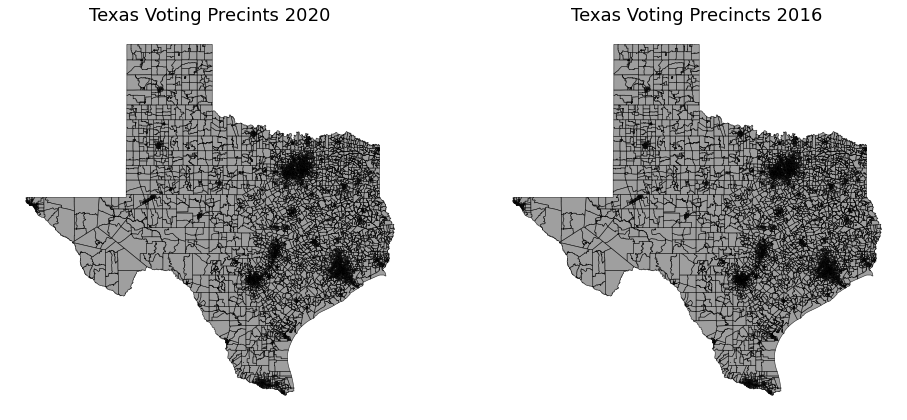

In [17]:
#creating a map to visualize precincts
#creating three subplots to visualize voting precincts in 2016, 2018 and 2020
fig, axs = plt.subplots(1, 2, figsize=(16, 14))

# name each subplot
ax1, ax2, = axs

# precincts 2016
tx_2020.plot( color = 'grey',
            edgecolor='black',
            linewidth=.6, 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Texas Voting Precints 2020",
             size = 18)

# precincts 2018
tx_2016.plot( color ='grey',
            edgecolor='black', 
            linewidth=.6, 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Texas Voting Precincts 2016",
             size = 18)

#saving plot in figure folder
plt.savefig('./figures/tx_votingprecincts_side_by_side.png')

<p><a name="match"></a></p>

## Matching past Election returns to 2022 legislative districts

In [18]:
#using centroid match function imported from helper module
#Testing the function on one precinct
test = tx_2020.iloc[0,-1].centroid
centroid_match(test, new_senate)

16

In [19]:
# using helper function to match precinct centroid from past election returns to new senate and house districts
count = 1
for item in [tx_2016, tx_2018, tx_2020]:
    for (index, geometry) in item.iterrows():
        centroid = item.loc[index]['geometry'].centroid
        item.loc[index, 'SD'] = centroid_match(centroid, new_senate)
        item.loc[index, 'HD'] = centroid_match(centroid, new_house)
        print(count, index)
    count += 1

1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
1 101
1 102
1 103
1 104
1 105
1 106
1 107
1 108
1 109
1 110
1 111
1 112
1 113
1 114
1 115
1 116
1 117
1 118
1 119
1 120
1 121
1 122
1 123
1 124
1 125
1 126
1 127
1 128
1 129
1 130
1 131
1 132
1 133
1 134
1 135
1 136
1 137
1 138
1 139
1 140
1 141
1 142
1 143
1 144
1 145
1 146
1 147
1 148
1 149
1 150
1 151
1 152
1 153
1 154
1 155
1 156
1 157
1 158
1 159
1 160
1 161
1 162
1 163
1 164
1 165
1 166
1 167
1 168
1 169
1 170
1 171
1 172
1 173
1 174
1 175
1 176
1 177
1 178
1 179
1 180
1 181
1 182
1 183
1 184


1 1335
1 1336
1 1337
1 1338
1 1339
1 1340
1 1341
1 1342
1 1343
1 1344
1 1345
1 1346
1 1347
1 1348
1 1349
1 1350
1 1351
1 1352
1 1353
1 1354
1 1355
1 1356
1 1357
1 1358
1 1359
1 1360
1 1361
1 1362
1 1363
1 1364
1 1365
1 1366
1 1367
1 1368
1 1369
1 1370
1 1371
1 1372
1 1373
1 1374
1 1375
1 1376
1 1377
1 1378
1 1379
1 1380
1 1381
1 1382
1 1383
1 1384
1 1385
1 1386
1 1387
1 1388
1 1389
1 1390
1 1391
1 1392
1 1393
1 1394
1 1395
1 1396
1 1397
1 1398
1 1399
1 1400
1 1401
1 1402
1 1403
1 1404
1 1405
1 1406
1 1407
1 1408
1 1409
1 1410
1 1411
1 1412
1 1413
1 1414
1 1415
1 1416
1 1417
1 1418
1 1419
1 1420
1 1421
1 1422
1 1423
1 1424
1 1425
1 1426
1 1427
1 1428
1 1429
1 1430
1 1431
1 1432
1 1433
1 1434
1 1435
1 1436
1 1437
1 1438
1 1439
1 1440
1 1441
1 1442
1 1443
1 1444
1 1445
1 1446
1 1447
1 1448
1 1449
1 1450
1 1451
1 1452
1 1453
1 1454
1 1455
1 1456
1 1457
1 1458
1 1459
1 1460
1 1461
1 1462
1 1463
1 1464
1 1465
1 1466
1 1467
1 1468
1 1469
1 1470
1 1471
1 1472
1 1473
1 1474
1 1475
1 1476
1 1477

1 2508
1 2509
1 2510
1 2511
1 2512
1 2513
1 2514
1 2515
1 2516
1 2517
1 2518
1 2519
1 2520
1 2521
1 2522
1 2523
1 2524
1 2525
1 2526
1 2527
1 2528
1 2529
1 2530
1 2531
1 2532
1 2533
1 2534
1 2535
1 2536
1 2537
1 2538
1 2539
1 2540
1 2541
1 2542
1 2543
1 2544
1 2545
1 2546
1 2547
1 2548
1 2549
1 2550
1 2551
1 2552
1 2553
1 2554
1 2555
1 2556
1 2557
1 2558
1 2559
1 2560
1 2561
1 2562
1 2563
1 2564
1 2565
1 2566
1 2567
1 2568
1 2569
1 2570
1 2571
1 2572
1 2573
1 2574
1 2575
1 2576
1 2577
1 2578
1 2579
1 2580
1 2581
1 2582
1 2583
1 2584
1 2585
1 2586
1 2587
1 2588
1 2589
1 2590
1 2591
1 2592
1 2593
1 2594
1 2595
1 2596
1 2597
1 2598
1 2599
1 2600
1 2601
1 2602
1 2603
1 2604
1 2605
1 2606
1 2607
1 2608
1 2609
1 2610
1 2611
1 2612
1 2613
1 2614
1 2615
1 2616
1 2617
1 2618
1 2619
1 2620
1 2621
1 2622
1 2623
1 2624
1 2625
1 2626
1 2627
1 2628
1 2629
1 2630
1 2631
1 2632
1 2633
1 2634
1 2635
1 2636
1 2637
1 2638
1 2639
1 2640
1 2641
1 2642
1 2643
1 2644
1 2645
1 2646
1 2647
1 2648
1 2649
1 2650

1 3684
1 3685
1 3686
1 3687
1 3688
1 3689
1 3690
1 3691
1 3692
1 3693
1 3694
1 3695
1 3696
1 3697
1 3698
1 3699
1 3700
1 3701
1 3702
1 3703
1 3704
1 3705
1 3706
1 3707
1 3708
1 3709
1 3710
1 3711
1 3712
1 3713
1 3714
1 3715
1 3716
1 3717
1 3718
1 3719
1 3720
1 3721
1 3722
1 3723
1 3724
1 3725
1 3726
1 3727
1 3728
1 3729
1 3730
1 3731
1 3732
1 3733
1 3734
1 3735
1 3736
1 3737
1 3738
1 3739
1 3740
1 3741
1 3742
1 3743
1 3744
1 3745
1 3746
1 3747
1 3748
1 3749
1 3750
1 3751
1 3752
1 3753
1 3754
1 3755
1 3756
1 3757
1 3758
1 3759
1 3760
1 3761
1 3762
1 3763
1 3764
1 3765
1 3766
1 3767
1 3768
1 3769
1 3770
1 3771
1 3772
1 3773
1 3774
1 3775
1 3776
1 3777
1 3778
1 3779
1 3780
1 3781
1 3782
1 3783
1 3784
1 3785
1 3786
1 3787
1 3788
1 3789
1 3790
1 3791
1 3792
1 3793
1 3794
1 3795
1 3796
1 3797
1 3798
1 3799
1 3800
1 3801
1 3802
1 3803
1 3804
1 3805
1 3806
1 3807
1 3808
1 3809
1 3810
1 3811
1 3812
1 3813
1 3814
1 3815
1 3816
1 3817
1 3818
1 3819
1 3820
1 3821
1 3822
1 3823
1 3824
1 3825
1 3826

1 4857
1 4858
1 4859
1 4860
1 4861
1 4862
1 4863
1 4864
1 4865
1 4866
1 4867
1 4868
1 4869
1 4870
1 4871
1 4872
1 4873
1 4874
1 4875
1 4876
1 4877
1 4878
1 4879
1 4880
1 4881
1 4882
1 4883
1 4884
1 4885
1 4886
1 4887
1 4888
1 4889
1 4890
1 4891
1 4892
1 4893
1 4894
1 4895
1 4896
1 4897
1 4898
1 4899
1 4900
1 4901
1 4902
1 4903
1 4904
1 4905
1 4906
1 4907
1 4908
1 4909
1 4910
1 4911
1 4912
1 4913
1 4914
1 4915
1 4916
1 4917
1 4918
1 4919
1 4920
1 4921
1 4922
1 4923
1 4924
1 4925
1 4926
1 4927
1 4928
1 4929
1 4930
1 4931
1 4932
1 4933
1 4934
1 4935
1 4936
1 4937
1 4938
1 4939
1 4940
1 4941
1 4942
1 4943
1 4944
1 4945
1 4946
1 4947
1 4948
1 4949
1 4950
1 4951
1 4952
1 4953
1 4954
1 4955
1 4956
1 4957
1 4958
1 4959
1 4960
1 4961
1 4962
1 4963
1 4964
1 4965
1 4966
1 4967
1 4968
1 4969
1 4970
1 4971
1 4972
1 4973
1 4974
1 4975
1 4976
1 4977
1 4978
1 4979
1 4980
1 4981
1 4982
1 4983
1 4984
1 4985
1 4986
1 4987
1 4988
1 4989
1 4990
1 4991
1 4992
1 4993
1 4994
1 4995
1 4996
1 4997
1 4998
1 4999

1 6037
1 6038
1 6039
1 6040
1 6041
1 6042
1 6043
1 6044
1 6045
1 6046
1 6047
1 6048
1 6049
1 6050
1 6051
1 6052
1 6053
1 6054
1 6055
1 6056
1 6057
1 6058
1 6059
1 6060
1 6061
1 6062
1 6063
1 6064
1 6065
1 6066
1 6067
1 6068
1 6069
1 6070
1 6071
1 6072
1 6073
1 6074
1 6075
1 6076
1 6077
1 6078
1 6079
1 6080
1 6081
1 6082
1 6083
1 6084
1 6085
1 6086
1 6087
1 6088
1 6089
1 6090
1 6091
1 6092
1 6093
1 6094
1 6095
1 6096
1 6097
1 6098
1 6099
1 6100
1 6101
1 6102
1 6103
1 6104
1 6105
1 6106
1 6107
1 6108
1 6109
1 6110
1 6111
1 6112
1 6113
1 6114
1 6115
1 6116
1 6117
1 6118
1 6119
1 6120
1 6121
1 6122
1 6123
1 6124
1 6125
1 6126
1 6127
1 6128
1 6129
1 6130
1 6131
1 6132
1 6133
1 6134
1 6135
1 6136
1 6137
1 6138
1 6139
1 6140
1 6141
1 6142
1 6143
1 6144
1 6145
1 6146
1 6147
1 6148
1 6149
1 6150
1 6151
1 6152
1 6153
1 6154
1 6155
1 6156
1 6157
1 6158
1 6159
1 6160
1 6161
1 6162
1 6163
1 6164
1 6165
1 6166
1 6167
1 6168
1 6169
1 6170
1 6171
1 6172
1 6173
1 6174
1 6175
1 6176
1 6177
1 6178
1 6179

1 7217
1 7218
1 7219
1 7220
1 7221
1 7222
1 7223
1 7224
1 7225
1 7226
1 7227
1 7228
1 7229
1 7230
1 7231
1 7232
1 7233
1 7234
1 7235
1 7236
1 7237
1 7238
1 7239
1 7240
1 7241
1 7242
1 7243
1 7244
1 7245
1 7246
1 7247
1 7248
1 7249
1 7250
1 7251
1 7252
1 7253
1 7254
1 7255
1 7256
1 7257
1 7258
1 7259
1 7260
1 7261
1 7262
1 7263
1 7264
1 7265
1 7266
1 7267
1 7268
1 7269
1 7270
1 7271
1 7272
1 7273
1 7274
1 7275
1 7276
1 7277
1 7278
1 7279
1 7280
1 7281
1 7282
1 7283
1 7284
1 7285
1 7286
1 7287
1 7288
1 7289
1 7290
1 7291
1 7292
1 7293
1 7294
1 7295
1 7296
1 7297
1 7298
1 7299
1 7300
1 7301
1 7302
1 7303
1 7304
1 7305
1 7306
1 7307
1 7308
1 7309
1 7310
1 7311
1 7312
1 7313
1 7314
1 7315
1 7316
1 7317
1 7318
1 7319
1 7320
1 7321
1 7322
1 7323
1 7324
1 7325
1 7326
1 7327
1 7328
1 7329
1 7330
1 7331
1 7332
1 7333
1 7334
1 7335
1 7336
1 7337
1 7338
1 7339
1 7340
1 7341
1 7342
1 7343
1 7344
1 7345
1 7346
1 7347
1 7348
1 7349
1 7350
1 7351
1 7352
1 7353
1 7354
1 7355
1 7356
1 7357
1 7358
1 7359

1 8392
1 8393
1 8394
1 8395
1 8396
1 8397
1 8398
1 8399
1 8400
1 8401
1 8402
1 8403
1 8404
1 8405
1 8406
1 8407
1 8408
1 8409
1 8410
1 8411
1 8412
1 8413
1 8414
1 8415
1 8416
1 8417
1 8418
1 8419
1 8420
1 8421
1 8422
1 8423
1 8424
1 8425
1 8426
1 8427
1 8428
1 8429
1 8430
1 8431
1 8432
1 8433
1 8434
1 8435
1 8436
1 8437
1 8438
1 8439
1 8440
1 8441
1 8442
1 8443
1 8444
1 8445
1 8446
1 8447
1 8448
1 8449
1 8450
1 8451
1 8452
1 8453
1 8454
1 8455
1 8456
1 8457
1 8458
1 8459
1 8460
1 8461
1 8462
1 8463
1 8464
1 8465
1 8466
1 8467
1 8468
1 8469
1 8470
1 8471
1 8472
1 8473
1 8474
1 8475
1 8476
1 8477
1 8478
1 8479
1 8480
1 8481
1 8482
1 8483
1 8484
1 8485
1 8486
1 8487
1 8488
1 8489
1 8490
1 8491
1 8492
1 8493
1 8494
1 8495
1 8496
1 8497
1 8498
1 8499
1 8500
1 8501
1 8502
1 8503
1 8504
1 8505
1 8506
1 8507
1 8508
1 8509
1 8510
1 8511
1 8512
1 8513
1 8514
1 8515
1 8516
1 8517
1 8518
1 8519
1 8520
1 8521
1 8522
1 8523
1 8524
1 8525
1 8526
1 8527
1 8528
1 8529
1 8530
1 8531
1 8532
1 8533
1 8534

2 882
2 883
2 884
2 885
2 886
2 887
2 888
2 889
2 890
2 891
2 892
2 893
2 894
2 895
2 896
2 897
2 898
2 899
2 900
2 901
2 902
2 903
2 904
2 905
2 906
2 907
2 908
2 909
2 910
2 911
2 912
2 913
2 914
2 915
2 916
2 917
2 918
2 919
2 920
2 921
2 922
2 923
2 924
2 925
2 926
2 927
2 928
2 929
2 930
2 931
2 932
2 933
2 934
2 935
2 936
2 937
2 938
2 939
2 940
2 941
2 942
2 943
2 944
2 945
2 946
2 947
2 948
2 949
2 950
2 951
2 952
2 953
2 954
2 955
2 956
2 957
2 958
2 959
2 960
2 961
2 962
2 963
2 964
2 965
2 966
2 967
2 968
2 969
2 970
2 971
2 972
2 973
2 974
2 975
2 976
2 977
2 978
2 979
2 980
2 981
2 982
2 983
2 984
2 985
2 986
2 987
2 988
2 989
2 990
2 991
2 992
2 993
2 994
2 995
2 996
2 997
2 998
2 999
2 1000
2 1001
2 1002
2 1003
2 1004
2 1005
2 1006
2 1007
2 1008
2 1009
2 1010
2 1011
2 1012
2 1013
2 1014
2 1015
2 1016
2 1017
2 1018
2 1019
2 1020
2 1021
2 1022
2 1023
2 1024
2 1025
2 1026
2 1027
2 1028
2 1029
2 1030
2 1031
2 1032
2 1033
2 1034
2 1035
2 1036
2 1037
2 1038
2 1039
2 1040
2 104

2 2076
2 2077
2 2078
2 2079
2 2080
2 2081
2 2082
2 2083
2 2084
2 2085
2 2086
2 2087
2 2088
2 2089
2 2090
2 2091
2 2092
2 2093
2 2094
2 2095
2 2096
2 2097
2 2098
2 2099
2 2100
2 2101
2 2102
2 2103
2 2104
2 2105
2 2106
2 2107
2 2108
2 2109
2 2110
2 2111
2 2112
2 2113
2 2114
2 2115
2 2116
2 2117
2 2118
2 2119
2 2120
2 2121
2 2122
2 2123
2 2124
2 2125
2 2126
2 2127
2 2128
2 2129
2 2130
2 2131
2 2132
2 2133
2 2134
2 2135
2 2136
2 2137
2 2138
2 2139
2 2140
2 2141
2 2142
2 2143
2 2144
2 2145
2 2146
2 2147
2 2148
2 2149
2 2150
2 2151
2 2152
2 2153
2 2154
2 2155
2 2156
2 2157
2 2158
2 2159
2 2160
2 2161
2 2162
2 2163
2 2164
2 2165
2 2166
2 2167
2 2168
2 2169
2 2170
2 2171
2 2172
2 2173
2 2174
2 2175
2 2176
2 2177
2 2178
2 2179
2 2180
2 2181
2 2182
2 2183
2 2184
2 2185
2 2186
2 2187
2 2188
2 2189
2 2190
2 2191
2 2192
2 2193
2 2194
2 2195
2 2196
2 2197
2 2198
2 2199
2 2200
2 2201
2 2202
2 2203
2 2204
2 2205
2 2206
2 2207
2 2208
2 2209
2 2210
2 2211
2 2212
2 2213
2 2214
2 2215
2 2216
2 2217
2 2218

2 3257
2 3258
2 3259
2 3260
2 3261
2 3262
2 3263
2 3264
2 3265
2 3266
2 3267
2 3268
2 3269
2 3270
2 3271
2 3272
2 3273
2 3274
2 3275
2 3276
2 3277
2 3278
2 3279
2 3280
2 3281
2 3282
2 3283
2 3284
2 3285
2 3286
2 3287
2 3288
2 3289
2 3290
2 3291
2 3292
2 3293
2 3294
2 3295
2 3296
2 3297
2 3298
2 3299
2 3300
2 3301
2 3302
2 3303
2 3304
2 3305
2 3306
2 3307
2 3308
2 3309
2 3310
2 3311
2 3312
2 3313
2 3314
2 3315
2 3316
2 3317
2 3318
2 3319
2 3320
2 3321
2 3322
2 3323
2 3324
2 3325
2 3326
2 3327
2 3328
2 3329
2 3330
2 3331
2 3332
2 3333
2 3334
2 3335
2 3336
2 3337
2 3338
2 3339
2 3340
2 3341
2 3342
2 3343
2 3344
2 3345
2 3346
2 3347
2 3348
2 3349
2 3350
2 3351
2 3352
2 3353
2 3354
2 3355
2 3356
2 3357
2 3358
2 3359
2 3360
2 3361
2 3362
2 3363
2 3364
2 3365
2 3366
2 3367
2 3368
2 3369
2 3370
2 3371
2 3372
2 3373
2 3374
2 3375
2 3376
2 3377
2 3378
2 3379
2 3380
2 3381
2 3382
2 3383
2 3384
2 3385
2 3386
2 3387
2 3388
2 3389
2 3390
2 3391
2 3392
2 3393
2 3394
2 3395
2 3396
2 3397
2 3398
2 3399

2 4441
2 4442
2 4443
2 4444
2 4445
2 4446
2 4447
2 4448
2 4449
2 4450
2 4451
2 4452
2 4453
2 4454
2 4455
2 4456
2 4457
2 4458
2 4459
2 4460
2 4461
2 4462
2 4463
2 4464
2 4465
2 4466
2 4467
2 4468
2 4469
2 4470
2 4471
2 4472
2 4473
2 4474
2 4475
2 4476
2 4477
2 4478
2 4479
2 4480
2 4481
2 4482
2 4483
2 4484
2 4485
2 4486
2 4487
2 4488
2 4489
2 4490
2 4491
2 4492
2 4493
2 4494
2 4495
2 4496
2 4497
2 4498
2 4499
2 4500
2 4501
2 4502
2 4503
2 4504
2 4505
2 4506
2 4507
2 4508
2 4509
2 4510
2 4511
2 4512
2 4513
2 4514
2 4515
2 4516
2 4517
2 4518
2 4519
2 4520
2 4521
2 4522
2 4523
2 4524
2 4525
2 4526
2 4527
2 4528
2 4529
2 4530
2 4531
2 4532
2 4533
2 4534
2 4535
2 4536
2 4537
2 4538
2 4539
2 4540
2 4541
2 4542
2 4543
2 4544
2 4545
2 4546
2 4547
2 4548
2 4549
2 4550
2 4551
2 4552
2 4553
2 4554
2 4555
2 4556
2 4557
2 4558
2 4559
2 4560
2 4561
2 4562
2 4563
2 4564
2 4565
2 4566
2 4567
2 4568
2 4569
2 4570
2 4571
2 4572
2 4573
2 4574
2 4575
2 4576
2 4577
2 4578
2 4579
2 4580
2 4581
2 4582
2 4583

2 5625
2 5626
2 5627
2 5628
2 5629
2 5630
2 5631
2 5632
2 5633
2 5634
2 5635
2 5636
2 5637
2 5638
2 5639
2 5640
2 5641
2 5642
2 5643
2 5644
2 5645
2 5646
2 5647
2 5648
2 5649
2 5650
2 5651
2 5652
2 5653
2 5654
2 5655
2 5656
2 5657
2 5658
2 5659
2 5660
2 5661
2 5662
2 5663
2 5664
2 5665
2 5666
2 5667
2 5668
2 5669
2 5670
2 5671
2 5672
2 5673
2 5674
2 5675
2 5676
2 5677
2 5678
2 5679
2 5680
2 5681
2 5682
2 5683
2 5684
2 5685
2 5686
2 5687
2 5688
2 5689
2 5690
2 5691
2 5692
2 5693
2 5694
2 5695
2 5696
2 5697
2 5698
2 5699
2 5700
2 5701
2 5702
2 5703
2 5704
2 5705
2 5706
2 5707
2 5708
2 5709
2 5710
2 5711
2 5712
2 5713
2 5714
2 5715
2 5716
2 5717
2 5718
2 5719
2 5720
2 5721
2 5722
2 5723
2 5724
2 5725
2 5726
2 5727
2 5728
2 5729
2 5730
2 5731
2 5732
2 5733
2 5734
2 5735
2 5736
2 5737
2 5738
2 5739
2 5740
2 5741
2 5742
2 5743
2 5744
2 5745
2 5746
2 5747
2 5748
2 5749
2 5750
2 5751
2 5752
2 5753
2 5754
2 5755
2 5756
2 5757
2 5758
2 5759
2 5760
2 5761
2 5762
2 5763
2 5764
2 5765
2 5766
2 5767

2 6806
2 6807
2 6808
2 6809
2 6810
2 6811
2 6812
2 6813
2 6814
2 6815
2 6816
2 6817
2 6818
2 6819
2 6820
2 6821
2 6822
2 6823
2 6824
2 6825
2 6826
2 6827
2 6828
2 6829
2 6830
2 6831
2 6832
2 6833
2 6834
2 6835
2 6836
2 6837
2 6838
2 6839
2 6840
2 6841
2 6842
2 6843
2 6844
2 6845
2 6846
2 6847
2 6848
2 6849
2 6850
2 6851
2 6852
2 6853
2 6854
2 6855
2 6856
2 6857
2 6858
2 6859
2 6860
2 6861
2 6862
2 6863
2 6864
2 6865
2 6866
2 6867
2 6868
2 6869
2 6870
2 6871
2 6872
2 6873
2 6874
2 6875
2 6876
2 6877
2 6878
2 6879
2 6880
2 6881
2 6882
2 6883
2 6884
2 6885
2 6886
2 6887
2 6888
2 6889
2 6890
2 6891
2 6892
2 6893
2 6894
2 6895
2 6896
2 6897
2 6898
2 6899
2 6900
2 6901
2 6902
2 6903
2 6904
2 6905
2 6906
2 6907
2 6908
2 6909
2 6910
2 6911
2 6912
2 6913
2 6914
2 6915
2 6916
2 6917
2 6918
2 6919
2 6920
2 6921
2 6922
2 6923
2 6924
2 6925
2 6926
2 6927
2 6928
2 6929
2 6930
2 6931
2 6932
2 6933
2 6934
2 6935
2 6936
2 6937
2 6938
2 6939
2 6940
2 6941
2 6942
2 6943
2 6944
2 6945
2 6946
2 6947
2 6948

2 7985
2 7986
2 7987
2 7988
2 7989
2 7990
2 7991
2 7992
2 7993
2 7994
2 7995
2 7996
2 7997
2 7998
2 7999
2 8000
2 8001
2 8002
2 8003
2 8004
2 8005
2 8006
2 8007
2 8008
2 8009
2 8010
2 8011
2 8012
2 8013
2 8014
2 8015
2 8016
2 8017
2 8018
2 8019
2 8020
2 8021
2 8022
2 8023
2 8024
2 8025
2 8026
2 8027
2 8028
2 8029
2 8030
2 8031
2 8032
2 8033
2 8034
2 8035
2 8036
2 8037
2 8038
2 8039
2 8040
2 8041
2 8042
2 8043
2 8044
2 8045
2 8046
2 8047
2 8048
2 8049
2 8050
2 8051
2 8052
2 8053
2 8054
2 8055
2 8056
2 8057
2 8058
2 8059
2 8060
2 8061
2 8062
2 8063
2 8064
2 8065
2 8066
2 8067
2 8068
2 8069
2 8070
2 8071
2 8072
2 8073
2 8074
2 8075
2 8076
2 8077
2 8078
2 8079
2 8080
2 8081
2 8082
2 8083
2 8084
2 8085
2 8086
2 8087
2 8088
2 8089
2 8090
2 8091
2 8092
2 8093
2 8094
2 8095
2 8096
2 8097
2 8098
2 8099
2 8100
2 8101
2 8102
2 8103
2 8104
2 8105
2 8106
2 8107
2 8108
2 8109
2 8110
2 8111
2 8112
2 8113
2 8114
2 8115
2 8116
2 8117
2 8118
2 8119
2 8120
2 8121
2 8122
2 8123
2 8124
2 8125
2 8126
2 8127

3 283
3 284
3 285
3 286
3 287
3 288
3 289
3 290
3 291
3 292
3 293
3 294
3 295
3 296
3 297
3 298
3 299
3 300
3 301
3 302
3 303
3 304
3 305
3 306
3 307
3 308
3 309
3 310
3 311
3 312
3 313
3 314
3 315
3 316
3 317
3 318
3 319
3 320
3 321
3 322
3 323
3 324
3 325
3 326
3 327
3 328
3 329
3 330
3 331
3 332
3 333
3 334
3 335
3 336
3 337
3 338
3 339
3 340
3 341
3 342
3 343
3 344
3 345
3 346
3 347
3 348
3 349
3 350
3 351
3 352
3 353
3 354
3 355
3 356
3 357
3 358
3 359
3 360
3 361
3 362
3 363
3 364
3 365
3 366
3 367
3 368
3 369
3 370
3 371
3 372
3 373
3 374
3 375
3 376
3 377
3 378
3 379
3 380
3 381
3 382
3 383
3 384
3 385
3 386
3 387
3 388
3 389
3 390
3 391
3 392
3 393
3 394
3 395
3 396
3 397
3 398
3 399
3 400
3 401
3 402
3 403
3 404
3 405
3 406
3 407
3 408
3 409
3 410
3 411
3 412
3 413
3 414
3 415
3 416
3 417
3 418
3 419
3 420
3 421
3 422
3 423
3 424
3 425
3 426
3 427
3 428
3 429
3 430
3 431
3 432
3 433
3 434
3 435
3 436
3 437
3 438
3 439
3 440
3 441
3 442
3 443
3 444
3 445
3 446
3 447
3 448
3 44

3 1568
3 1569
3 1570
3 1571
3 1572
3 1573
3 1574
3 1575
3 1576
3 1577
3 1578
3 1579
3 1580
3 1581
3 1582
3 1583
3 1584
3 1585
3 1586
3 1587
3 1588
3 1589
3 1590
3 1591
3 1592
3 1593
3 1594
3 1595
3 1596
3 1597
3 1598
3 1599
3 1600
3 1601
3 1602
3 1603
3 1604
3 1605
3 1606
3 1607
3 1608
3 1609
3 1610
3 1611
3 1612
3 1613
3 1614
3 1615
3 1616
3 1617
3 1618
3 1619
3 1620
3 1621
3 1622
3 1623
3 1624
3 1625
3 1626
3 1627
3 1628
3 1629
3 1630
3 1631
3 1632
3 1633
3 1634
3 1635
3 1636
3 1637
3 1638
3 1639
3 1640
3 1641
3 1642
3 1643
3 1644
3 1645
3 1646
3 1647
3 1648
3 1649
3 1650
3 1651
3 1652
3 1653
3 1654
3 1655
3 1656
3 1657
3 1658
3 1659
3 1660
3 1661
3 1662
3 1663
3 1664
3 1665
3 1666
3 1667
3 1668
3 1669
3 1670
3 1671
3 1672
3 1673
3 1674
3 1675
3 1676
3 1677
3 1678
3 1679
3 1680
3 1681
3 1682
3 1683
3 1684
3 1685
3 1686
3 1687
3 1688
3 1689
3 1690
3 1691
3 1692
3 1693
3 1694
3 1695
3 1696
3 1697
3 1698
3 1699
3 1700
3 1701
3 1702
3 1703
3 1704
3 1705
3 1706
3 1707
3 1708
3 1709
3 1710

3 2749
3 2750
3 2751
3 2752
3 2753
3 2754
3 2755
3 2756
3 2757
3 2758
3 2759
3 2760
3 2761
3 2762
3 2763
3 2764
3 2765
3 2766
3 2767
3 2768
3 2769
3 2770
3 2771
3 2772
3 2773
3 2774
3 2775
3 2776
3 2777
3 2778
3 2779
3 2780
3 2781
3 2782
3 2783
3 2784
3 2785
3 2786
3 2787
3 2788
3 2789
3 2790
3 2791
3 2792
3 2793
3 2794
3 2795
3 2796
3 2797
3 2798
3 2799
3 2800
3 2801
3 2802
3 2803
3 2804
3 2805
3 2806
3 2807
3 2808
3 2809
3 2810
3 2811
3 2812
3 2813
3 2814
3 2815
3 2816
3 2817
3 2818
3 2819
3 2820
3 2821
3 2822
3 2823
3 2824
3 2825
3 2826
3 2827
3 2828
3 2829
3 2830
3 2831
3 2832
3 2833
3 2834
3 2835
3 2836
3 2837
3 2838
3 2839
3 2840
3 2841
3 2842
3 2843
3 2844
3 2845
3 2846
3 2847
3 2848
3 2849
3 2850
3 2851
3 2852
3 2853
3 2854
3 2855
3 2856
3 2857
3 2858
3 2859
3 2860
3 2861
3 2862
3 2863
3 2864
3 2865
3 2866
3 2867
3 2868
3 2869
3 2870
3 2871
3 2872
3 2873
3 2874
3 2875
3 2876
3 2877
3 2878
3 2879
3 2880
3 2881
3 2882
3 2883
3 2884
3 2885
3 2886
3 2887
3 2888
3 2889
3 2890
3 2891

3 3932
3 3933
3 3934
3 3935
3 3936
3 3937
3 3938
3 3939
3 3940
3 3941
3 3942
3 3943
3 3944
3 3945
3 3946
3 3947
3 3948
3 3949
3 3950
3 3951
3 3952
3 3953
3 3954
3 3955
3 3956
3 3957
3 3958
3 3959
3 3960
3 3961
3 3962
3 3963
3 3964
3 3965
3 3966
3 3967
3 3968
3 3969
3 3970
3 3971
3 3972
3 3973
3 3974
3 3975
3 3976
3 3977
3 3978
3 3979
3 3980
3 3981
3 3982
3 3983
3 3984
3 3985
3 3986
3 3987
3 3988
3 3989
3 3990
3 3991
3 3992
3 3993
3 3994
3 3995
3 3996
3 3997
3 3998
3 3999
3 4000
3 4001
3 4002
3 4003
3 4004
3 4005
3 4006
3 4007
3 4008
3 4009
3 4010
3 4011
3 4012
3 4013
3 4014
3 4015
3 4016
3 4017
3 4018
3 4019
3 4020
3 4021
3 4022
3 4023
3 4024
3 4025
3 4026
3 4027
3 4028
3 4029
3 4030
3 4031
3 4032
3 4033
3 4034
3 4035
3 4036
3 4037
3 4038
3 4039
3 4040
3 4041
3 4042
3 4043
3 4044
3 4045
3 4046
3 4047
3 4048
3 4049
3 4050
3 4051
3 4052
3 4053
3 4054
3 4055
3 4056
3 4057
3 4058
3 4059
3 4060
3 4061
3 4062
3 4063
3 4064
3 4065
3 4066
3 4067
3 4068
3 4069
3 4070
3 4071
3 4072
3 4073
3 4074

3 5115
3 5116
3 5117
3 5118
3 5119
3 5120
3 5121
3 5122
3 5123
3 5124
3 5125
3 5126
3 5127
3 5128
3 5129
3 5130
3 5131
3 5132
3 5133
3 5134
3 5135
3 5136
3 5137
3 5138
3 5139
3 5140
3 5141
3 5142
3 5143
3 5144
3 5145
3 5146
3 5147
3 5148
3 5149
3 5150
3 5151
3 5152
3 5153
3 5154
3 5155
3 5156
3 5157
3 5158
3 5159
3 5160
3 5161
3 5162
3 5163
3 5164
3 5165
3 5166
3 5167
3 5168
3 5169
3 5170
3 5171
3 5172
3 5173
3 5174
3 5175
3 5176
3 5177
3 5178
3 5179
3 5180
3 5181
3 5182
3 5183
3 5184
3 5185
3 5186
3 5187
3 5188
3 5189
3 5190
3 5191
3 5192
3 5193
3 5194
3 5195
3 5196
3 5197
3 5198
3 5199
3 5200
3 5201
3 5202
3 5203
3 5204
3 5205
3 5206
3 5207
3 5208
3 5209
3 5210
3 5211
3 5212
3 5213
3 5214
3 5215
3 5216
3 5217
3 5218
3 5219
3 5220
3 5221
3 5222
3 5223
3 5224
3 5225
3 5226
3 5227
3 5228
3 5229
3 5230
3 5231
3 5232
3 5233
3 5234
3 5235
3 5236
3 5237
3 5238
3 5239
3 5240
3 5241
3 5242
3 5243
3 5244
3 5245
3 5246
3 5247
3 5248
3 5249
3 5250
3 5251
3 5252
3 5253
3 5254
3 5255
3 5256
3 5257

3 6297
3 6298
3 6299
3 6300
3 6301
3 6302
3 6303
3 6304
3 6305
3 6306
3 6307
3 6308
3 6309
3 6310
3 6311
3 6312
3 6313
3 6314
3 6315
3 6316
3 6317
3 6318
3 6319
3 6320
3 6321
3 6322
3 6323
3 6324
3 6325
3 6326
3 6327
3 6328
3 6329
3 6330
3 6331
3 6332
3 6333
3 6334
3 6335
3 6336
3 6337
3 6338
3 6339
3 6340
3 6341
3 6342
3 6343
3 6344
3 6345
3 6346
3 6347
3 6348
3 6349
3 6350
3 6351
3 6352
3 6353
3 6354
3 6355
3 6356
3 6357
3 6358
3 6359
3 6360
3 6361
3 6362
3 6363
3 6364
3 6365
3 6366
3 6367
3 6368
3 6369
3 6370
3 6371
3 6372
3 6373
3 6374
3 6375
3 6376
3 6377
3 6378
3 6379
3 6380
3 6381
3 6382
3 6383
3 6384
3 6385
3 6386
3 6387
3 6388
3 6389
3 6390
3 6391
3 6392
3 6393
3 6394
3 6395
3 6396
3 6397
3 6398
3 6399
3 6400
3 6401
3 6402
3 6403
3 6404
3 6405
3 6406
3 6407
3 6408
3 6409
3 6410
3 6411
3 6412
3 6413
3 6414
3 6415
3 6416
3 6417
3 6418
3 6419
3 6420
3 6421
3 6422
3 6423
3 6424
3 6425
3 6426
3 6427
3 6428
3 6429
3 6430
3 6431
3 6432
3 6433
3 6434
3 6435
3 6436
3 6437
3 6438
3 6439

3 7470
3 7471
3 7472
3 7473
3 7474
3 7475
3 7476
3 7477
3 7478
3 7479
3 7480
3 7481
3 7482
3 7483
3 7484
3 7485
3 7486
3 7487
3 7488
3 7489
3 7490
3 7491
3 7492
3 7493
3 7494
3 7495
3 7496
3 7497
3 7498
3 7499
3 7500
3 7501
3 7502
3 7503
3 7504
3 7505
3 7506
3 7507
3 7508
3 7509
3 7510
3 7511
3 7512
3 7513
3 7514
3 7515
3 7516
3 7517
3 7518
3 7519
3 7520
3 7521
3 7522
3 7523
3 7524
3 7525
3 7526
3 7527
3 7528
3 7529
3 7530
3 7531
3 7532
3 7533
3 7534
3 7535
3 7536
3 7537
3 7538
3 7539
3 7540
3 7541
3 7542
3 7543
3 7544
3 7545
3 7546
3 7547
3 7548
3 7549
3 7550
3 7551
3 7552
3 7553
3 7554
3 7555
3 7556
3 7557
3 7558
3 7559
3 7560
3 7561
3 7562
3 7563
3 7564
3 7565
3 7566
3 7567
3 7568
3 7569
3 7570
3 7571
3 7572
3 7573
3 7574
3 7575
3 7576
3 7577
3 7578
3 7579
3 7580
3 7581
3 7582
3 7583
3 7584
3 7585
3 7586
3 7587
3 7588
3 7589
3 7590
3 7591
3 7592
3 7593
3 7594
3 7595
3 7596
3 7597
3 7598
3 7599
3 7600
3 7601
3 7602
3 7603
3 7604
3 7605
3 7606
3 7607
3 7608
3 7609
3 7610
3 7611
3 7612

3 8643
3 8644
3 8645
3 8646
3 8647
3 8648
3 8649
3 8650
3 8651
3 8652
3 8653
3 8654
3 8655
3 8656
3 8657
3 8658
3 8659
3 8660
3 8661
3 8662
3 8663
3 8664
3 8665
3 8666
3 8667
3 8668
3 8669
3 8670
3 8671
3 8672
3 8673
3 8674
3 8675
3 8676
3 8677
3 8678
3 8679
3 8680
3 8681
3 8682
3 8683
3 8684
3 8685
3 8686
3 8687
3 8688
3 8689
3 8690
3 8691
3 8692
3 8693
3 8694
3 8695
3 8696
3 8697
3 8698
3 8699
3 8700
3 8701
3 8702
3 8703
3 8704
3 8705
3 8706
3 8707
3 8708
3 8709
3 8710
3 8711
3 8712
3 8713
3 8714
3 8715
3 8716
3 8717
3 8718
3 8719
3 8720
3 8721
3 8722
3 8723
3 8724
3 8725
3 8726
3 8727
3 8728
3 8729
3 8730
3 8731
3 8732
3 8733
3 8734
3 8735
3 8736
3 8737
3 8738
3 8739
3 8740
3 8741
3 8742
3 8743
3 8744
3 8745
3 8746
3 8747
3 8748
3 8749
3 8750
3 8751
3 8752
3 8753
3 8754
3 8755
3 8756
3 8757
3 8758
3 8759
3 8760
3 8761
3 8762
3 8763
3 8764
3 8765
3 8766
3 8767
3 8768
3 8769
3 8770
3 8771
3 8772
3 8773
3 8774
3 8775
3 8776
3 8777
3 8778
3 8779
3 8780
3 8781
3 8782
3 8783
3 8784
3 8785

In [20]:
datasets = [(2016, tx_2016), (2018, tx_2018), (2020, tx_2020)]
#Checking whether matching worked
for year,item in datasets:
    for dist in ['HD', 'SD']:
        print(year, '\n', 'There are',item[dist].nunique(), 'in', dist)
        print('There are ', item[dist].isnull().values.sum(), 'null values')

2016 
 There are 150 in HD
There are  2 null values
2016 
 There are 31 in SD
There are  2 null values
2018 
 There are 150 in HD
There are  2 null values
2018 
 There are 31 in SD
There are  2 null values
2020 
 There are 150 in HD
There are  2 null values
2020 
 There are 31 in SD
There are  2 null values


In [21]:
#null values are for administrative precincts that do not have shapefile info
#removing rows with null values
for year,item in datasets:
    for dist in ['HD', 'SD']:
        if item[dist].isnull().values.any():
            item.dropna(axis = 0, how = 'any', inplace = True)

In [22]:
#confirming datasets are cleaned with no null values
for year,item in datasets:
    for dist in ['HD', 'SD']:
        print(year, '\n', 'There are',item[dist].nunique(), 'in', dist)
        print('There are ', item[dist].isnull().values.sum(), 'null values')

2016 
 There are 150 in HD
There are  0 null values
2016 
 There are 31 in SD
There are  0 null values
2018 
 There are 150 in HD
There are  0 null values
2018 
 There are 31 in SD
There are  0 null values
2020 
 There are 150 in HD
There are  0 null values
2020 
 There are 31 in SD
There are  0 null values


In [23]:
#examining each dataset
#tx_2020.head()
#tx_2018.head()
#tx_2016.head()

<p><a name="exp"></a></p>

## Exporting Cleaned Datasets

In [24]:
#saving cleaned and matched election returns, dropping precinct geometry, county key, and precinct key
for year,item in datasets:
    item.drop(['geometry', 'county_key', 'prec_key'], axis = 1).to_csv(r'data/cleaned/' + 'ctx_' + str(year) + '.csv', index = False)